In [1]:
import cliqueGenerator as clqgen
import random 
import matplotlib.pyplot as plt

In [2]:
old_population = [[1, 0, 1, 0], [1, 0, 0, 0]]

# Generación de poblaciones in place. 
def generate_population(old_population: list, population_size=0, vertex_num=0):
    # If it is empty, we generate for clique 3.
    if old_population == []:
        for _ in range(population_size):
            old_population.append([0]*vertex_num)
        for _ in range(2):
            add_random_vertex_to_all_population(old_population)
    else:
            add_random_vertex_to_all_population(old_population)

# Inplace.
def add_random_vertex_to_all_population(old_population):
    for individual in old_population:
        no_vertices_positions = []
        for vertex_index, vertex in enumerate(individual):
            if vertex == 0: 
                no_vertices_positions.append(vertex_index)
        new_vertex = random.randint(0, len(no_vertices_positions)-1)
        individual[no_vertices_positions[new_vertex]] = 1

In [3]:
# Doesn't matters if it's in place.
def fitness(individual, graph, current_clique_number) -> float:
    total = 0
    for index, has_vertex in enumerate(individual):
        # Tengo que contar como n(n-1) arcos, porque cuento cada uno dos veces.
        if has_vertex == 1:
            total += len(graph[index])
    return total/(current_clique_number*(current_clique_number-1))

In [4]:
# Not in place.
def crossover(individual1, individual2, k):
    # Contrary of the other.
    new_individual1, new_individual2 = non_k_crossover(individual1, individual2)
    while sum(new_individual1) != k or sum(new_individual2) != k:
        new_individual1, new_individual2 = non_k_crossover(individual1, individual2)
    return (new_individual1, new_individual2)

def non_k_crossover(individual1, individual2):
    size = len(individual1)
    random_permutation = [1 if random.random()>=0.5 else 0 for _ in range(size)]
    new_individual1 = [individual1[i] if random_permutation[i] else individual2[i] 
                    for i in range(size)]
    new_individual2 = [individual2[i] if random_permutation[i] else individual1[i] 
                    for i in range(size)]
    return (new_individual1, new_individual2)

In [5]:
# In place
def mutation(individual):
    size = len(individual)
    mutation_position1 = random.randint(0, size-1)
    mutation_position2 = random.randint(0, size-1)
    auxiliar = individual[mutation_position1]
    individual[mutation_position1] = individual[mutation_position2]
    individual[mutation_position2] = auxiliar

In [6]:
average_fitness_list = []
best_fitness_list = [] 

def next_generation(old_population, graph, current_clique_number, mutation_probability) -> list:
    # Calcs population fitness for old population.
    population_fitness = [fitness(individual, graph, current_clique_number) for individual in old_population]
    # Adds the average fitness and the best to the list.
    average_fitness_list.append(sum(population_fitness)/len(population_fitness))
    best_fitness_list.append(max(population_fitness))
    # Gets the probability each individual has of getting to the next generation.
    total_fitness = sum(population_fitness)
    population_probability = [fitness/total_fitness for fitness in population_fitness]
    # Adds to the new generation the individuals that had the luck according to their fitness.
    next_generation = []
    for individual in range(len(next_generation)):
        if random.random() <= population_probability[individual]:
            next_generation.append(old_population[individual])
    # Calc how many offspring is needed to cover for the loss in population.
    needed_offspring = len(old_population)-len(next_generation)
    sorted_best_population = [individual for _, individual in sorted(zip(population_fitness, old_population))]
    for i in range(0, needed_offspring-1, 2):
        new1, new2 = crossover(sorted_best_population[i], sorted_best_population[i+1], current_clique_number)
        next_generation.append(new1)
        next_generation.append(new2)
    if random.random() < mutation_probability:
                individual_to_mutate = random.randint(0, len(next_generation)-1)
                mutation(next_generation[individual_to_mutate])
    return next_generation

In [7]:
def has_k_clique(graph, k, population_size = 5, mutation_probability=0.05, generations=1000000):
    generation = 0
    population = []
    generate_population(population, population_size, len(graph))
    for _ in range(k-2):
        generate_population(population)
    while generation <= generations:
        population_fitness = [round(fitness(individual, graph, k), 2) 
                              for individual in population]
        if 1 <= sorted(population_fitness)[0]:
            print("Has clique of size", k,
                  "Population", population,
                  "Generation", generation)
            return True
        else: 
            population = next_generation(population, graph, k, mutation_probability)
        generation += 1
    print("DOES NOT HAVE clique of size", k,
                  "Population", population,
                  "Generation", generation) 
    return False

In [8]:
def plot_fitness_evolution(average_fitness_history, best_fitness_history, population_size, k_clique):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(len(average_fitness_history)), average_fitness_history)
    plt.xlabel("Generation")
    plt.ylabel("Average Fitness")
    plt.title(f"Population Size: {population_size}. K-clique {k_clique}")

    plt.subplot(1, 2, 2)
    plt.plot(range(len(best_fitness_history)), best_fitness_history)
    plt.xlabel("Generation")
    plt.ylabel("Fitness of the Best Individual")
    plt.title(f"Population Size: {population_size}. K-clique {k_clique}")

    plt.tight_layout()
    plt.show()

In [9]:
def maximum_clique_size(graph, population_size = 5, mutation_probability=0.05, generations=1000000):
    last = True
    # Penúltimo.
    second_last = True
    for i in range(3,len(graph)):
        second_last = last
        average_fitness_list.clear()
        best_fitness_list.clear()
        last = has_k_clique(graph, i, population_size, mutation_probability, generations)
        plot_fitness_evolution(average_fitness_list, best_fitness_list, generations, i)
        # If there was no clique found in the last two...
        if not last and not second_last:
            # Vamos a asumir que estamos subrepresentando el clique en 2.
            print("Maximum Clique: ", i-2)
            break

Graph  [[1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8], [11, 12, 14, 15, 18, 19], [10, 13, 15, 17, 19], [10, 15, 17], [11, 14, 16, 17, 18], [10, 13, 15, 19], [10, 11, 12, 14, 16, 18], [13, 15], [11, 12, 13, 19], [10, 13, 15, 19], [10, 11, 14, 17, 18], [23, 24, 26, 28, 29], [22, 23, 25, 27, 28], [21, 23, 25, 26, 28, 29], [20, 21, 22, 24, 25, 28, 29], [20, 23, 26, 29], [21, 22, 23, 27, 28, 29], [20, 22, 24, 27, 29], [21, 25, 26, 28, 29], [20, 21, 22, 23, 25, 27], [20, 22, 23, 24, 25, 26, 27], [33, 34, 36, 38, 39], [32, 33, 36, 37, 39], [31, 33, 34, 36, 39], [30, 31, 32, 36], [30, 32, 35, 38, 39], [34, 36, 38], [30, 31, 32, 33, 35, 37, 38], [31, 36, 38, 39], [30, 34, 35, 36, 37], [30, 31, 32, 34, 37], [43, 44, 47, 48], [43, 44, 47], [43, 45, 46, 48, 4

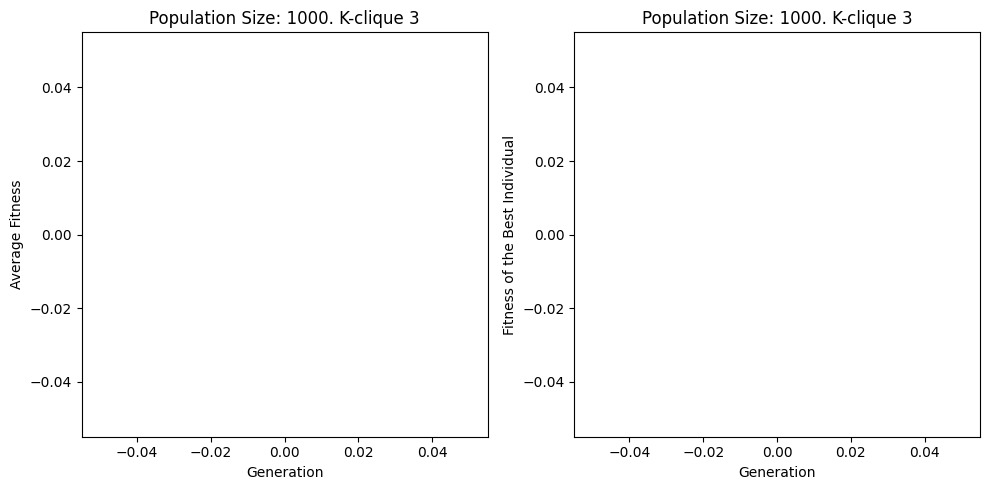

Has clique of size 4 Population [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

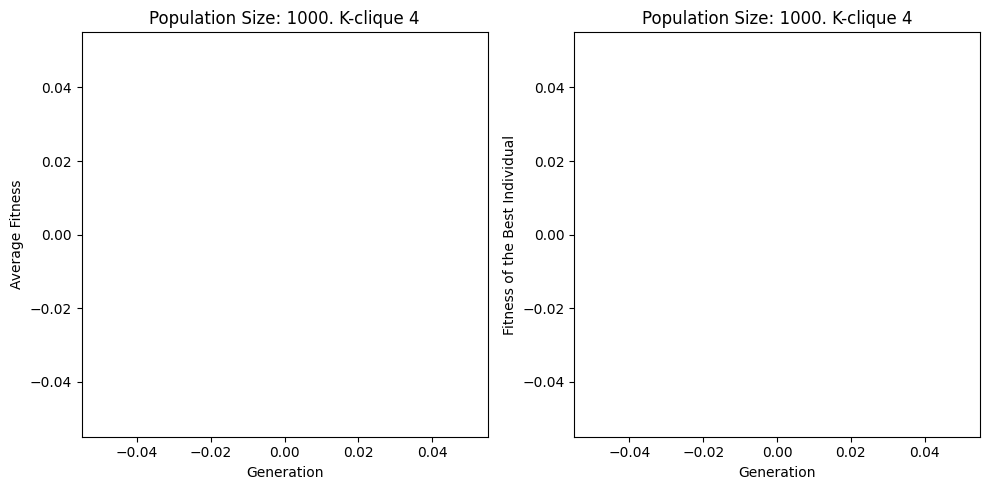

Has clique of size 5 Population [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0], [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 

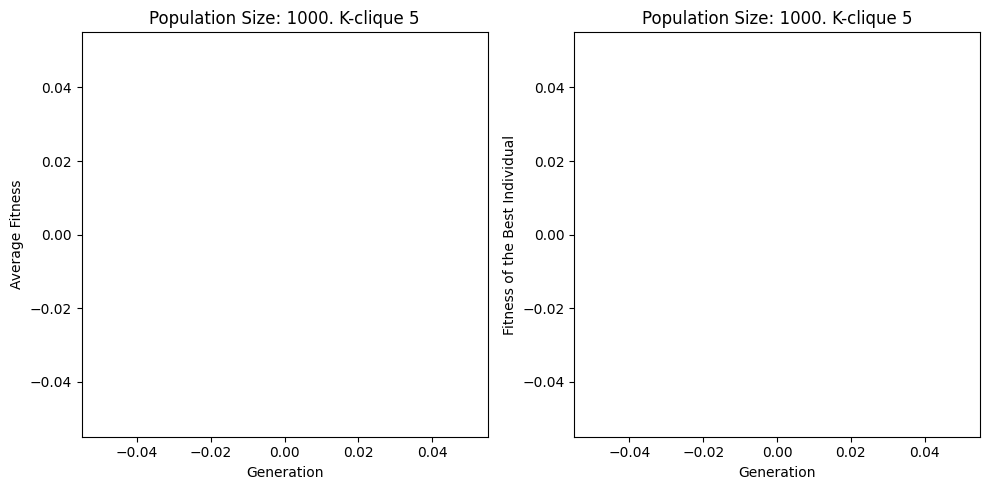

DOES NOT HAVE clique of size 6 Population [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,

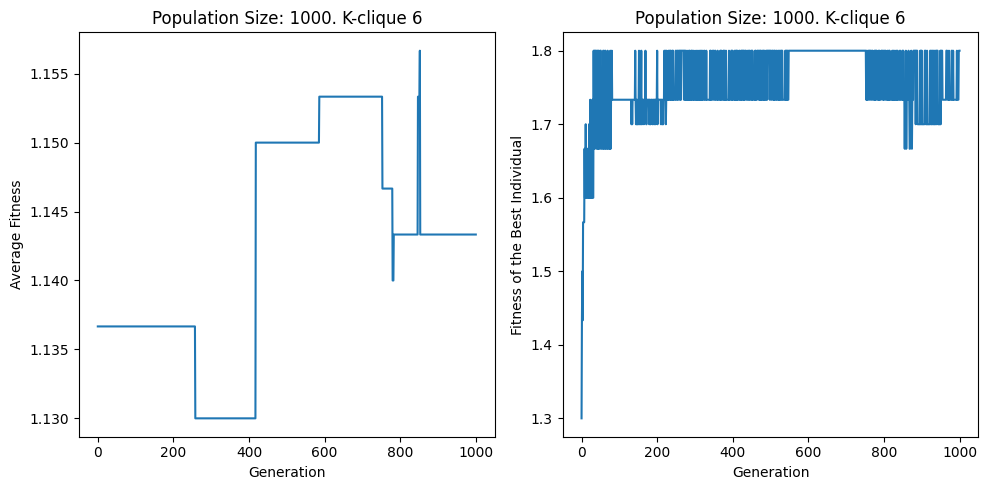

DOES NOT HAVE clique of size 7 Population [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

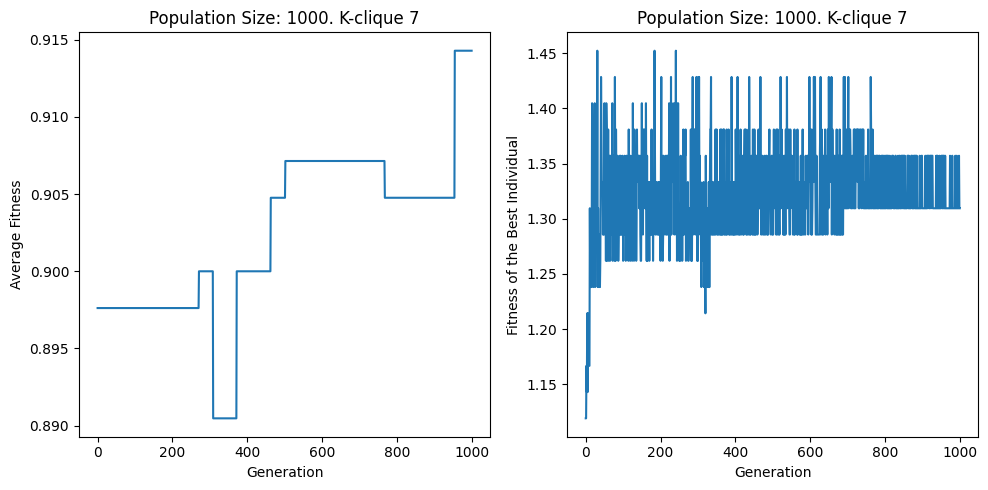

Maximum Clique:  7


In [10]:
graph = clqgen.generate(50, 10)
print("Graph ", graph)
maximum_clique_size(graph, population_size=10, generations=1000)